In [1]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregando os dados do novo arquivo CSV
novos_dados = pd.read_csv('metricas_desempenho.csv')

# Exibindo as primeiras linhas do novo dataframe
novos_dados.head()

,operacao,buffer_size,total_bytes,tempo_milissegundos,throughput_B_por_Seg
0,UPLOAD,1024,132676,4.014015197753906,33053188.257543363
1,DOWNLOAD,1024,5842,4.09698486328125,1425926.6741154564
2,DOWNLOAD,1024,5842,15.655517578125,373159.17348927876
3,DOWNLOAD,1024,5842,15.589475631713867,374739.99369905336
4,UPLOAD,1024,5842,0.0,0


In [3]:
novos_dados.dtypes

operacao                object
buffer_size             object
total_bytes             object
tempo_milissegundos     object
throughput_B_por_Seg    object
dtype: object

In [4]:
novos_dados['buffer_size'] = pd.to_numeric(novos_dados['buffer_size'], errors='coerce')
novos_dados['total_bytes'] = pd.to_numeric(novos_dados['total_bytes'], errors='coerce')
novos_dados['tempo_milissegundos'] = pd.to_numeric(novos_dados['tempo_milissegundos'], errors='coerce')
novos_dados['throughput_B_por_Seg'] = pd.to_numeric(novos_dados['throughput_B_por_Seg'], errors='coerce')

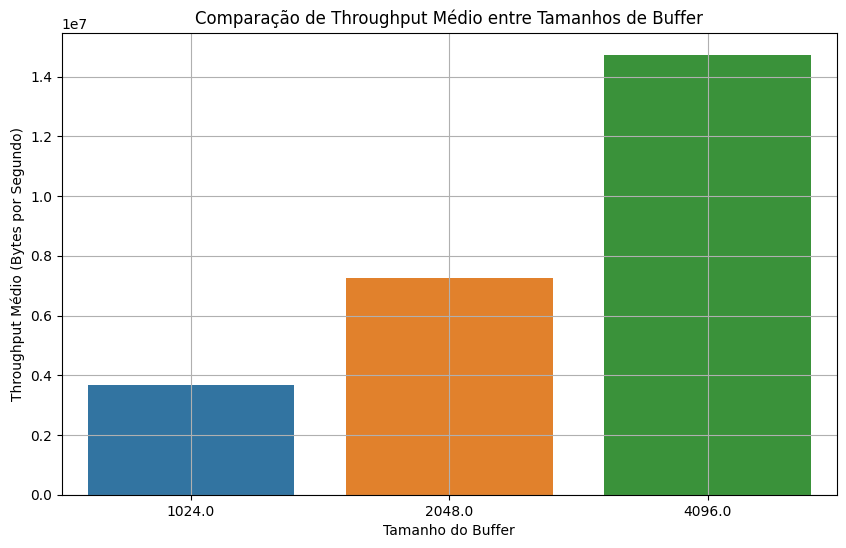

In [5]:
# Calculando a média de throughput para cada tamanho de buffer
avg_throughput_per_buffer = novos_dados.groupby('buffer_size')['throughput_B_por_Seg'].mean().reset_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x='buffer_size', y='throughput_B_por_Seg', data=avg_throughput_per_buffer)
plt.title('Comparação de Throughput Médio entre Tamanhos de Buffer')
plt.xlabel('Tamanho do Buffer')
plt.ylabel('Throughput Médio (Bytes por Segundo)')
plt.grid(True)
plt.show()

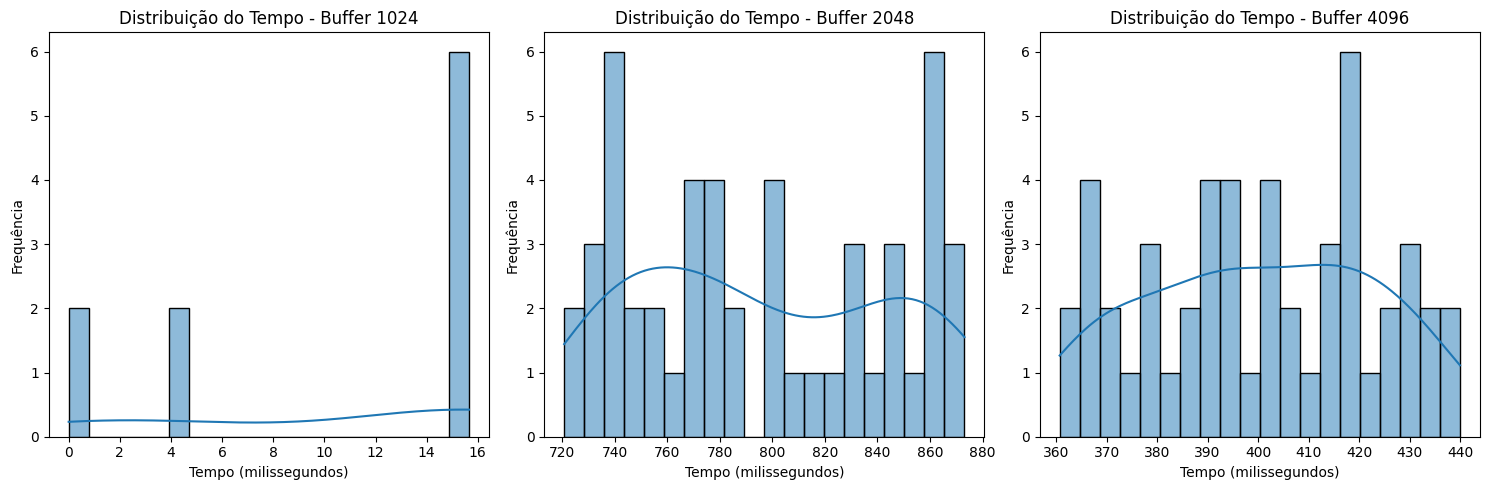

In [6]:
# Análise 2: Distribuição do Tempo em Milissegundos para cada Tamanho de Buffer

# Configurando o layout dos gráficos
plt.figure(figsize=(15, 5))

# Histograma para buffer_size de 1024
plt.subplot(1, 3, 1)
sns.histplot(novos_dados[novos_dados['buffer_size'] == 1024]['tempo_milissegundos'], bins=20, kde=True)
plt.title('Distribuição do Tempo - Buffer 1024')
plt.xlabel('Tempo (milissegundos)')
plt.ylabel('Frequência')

# Histograma para buffer_size de 2048
plt.subplot(1, 3, 2)
sns.histplot(novos_dados[novos_dados['buffer_size'] == 2048]['tempo_milissegundos'], bins=20, kde=True)
plt.title('Distribuição do Tempo - Buffer 2048')
plt.xlabel('Tempo (milissegundos)')
plt.ylabel('Frequência')

# Histograma para buffer_size de 4096
plt.subplot(1, 3, 3)
sns.histplot(novos_dados[novos_dados['buffer_size'] == 4096]['tempo_milissegundos'], bins=20, kde=True)
plt.title('Distribuição do Tempo - Buffer 4096')
plt.xlabel('Tempo (milissegundos)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()


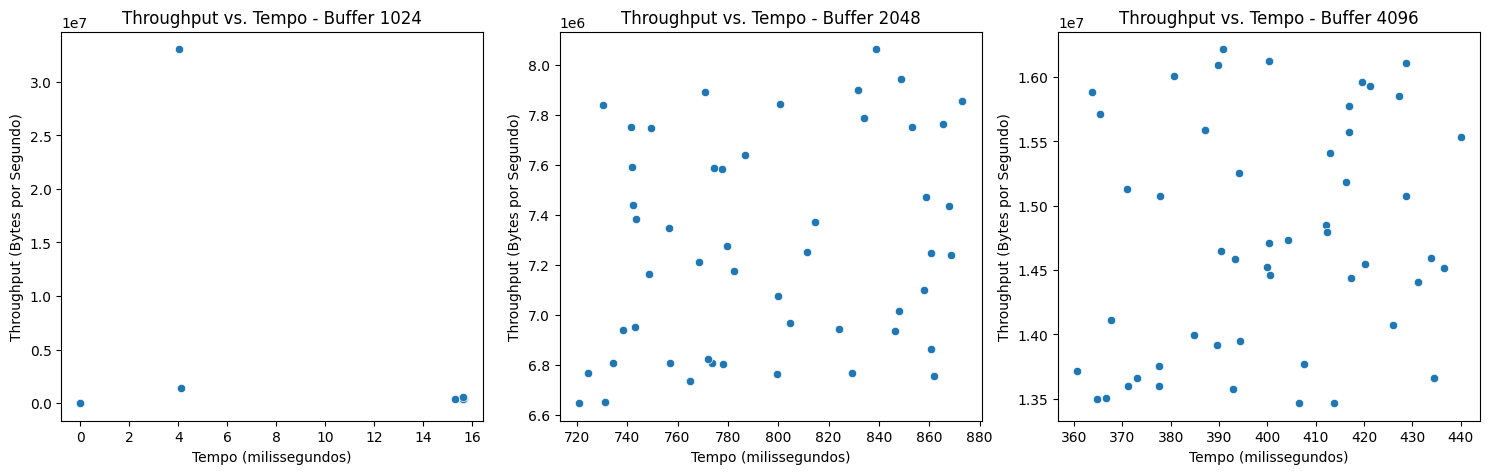

In [7]:
# Configurando o layout dos gráficos
plt.figure(figsize=(15, 5))

# Gráficos de dispersão para cada buffer_size
for i, buffer_size in enumerate([1024, 2048, 4096], 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x='tempo_milissegundos', y='throughput_B_por_Seg', data=novos_dados[novos_dados['buffer_size'] == buffer_size])
    plt.title(f'Throughput vs. Tempo - Buffer {buffer_size}')
    plt.xlabel('Tempo (milissegundos)')
    plt.ylabel('Throughput (Bytes por Segundo)')

plt.tight_layout()
plt.show()


Em redes de computadores, um buffer é uma região de memória usada para armazenar temporariamente dados enquanto eles estão sendo transferidos de um lugar para outro. No contexto de sockets, que são endpoints para enviar e receber dados em uma rede, o buffer atua como uma área de armazenamento para dados que estão sendo transmitidos ou recebidos.


Um buffer maior pode armazenar mais dados de uma só vez. Isso significa que cada operação de leitura ou escrita no socket pode transferir uma quantidade maior de dados, levando a menos operações de E/S (entrada/saída) para a mesma quantidade de dados.

Se o throughput é aumentado devido a um buffer maior, o tempo total necessário para transferir uma quantidade fixa de dados geralmente diminui, já que os dados são transferidos em menos operações de E/S e mais rapidamente.

Sugestão para próximos trabalhos: trabalhar com mais teste e isolar a rede e o disco da máquina, pois são fatores que podem fazer com que as métricas destes testes variem.